# Analyze Census Data with AI

- Use psycopg2 to load the data from the database into Python. 
- Use SQL filter the data to minimize the data transfer. 
- Use pandas and matplotlib to rocess and visualize the loaded data.
- Use OpenAI to assist coding.

### Install Python Packages

- jupyter-ai: the JupyterLab extension to call Generative AI models
- langchain-openai: the LangChain package to interact with OpenAI

In [ ]:
pip install jupyter-ai~=1.0 # Because I am using JupyterLab V3, I need to use Jupyter-ai V1.0

In [ ]:
pip install langchain-openai

### Secrete Manager Function

In [1]:
import boto3
from botocore.exceptions import ClientError
import json

def get_secret(secret_name):
    region_name = "us-east-1"

    # Create a Secrets Manager client
    session = boto3.session.Session()
    client = session.client(
        service_name='secretsmanager',
        region_name=region_name
    )

    try:
        get_secret_value_response = client.get_secret_value(
            SecretId=secret_name
        )
    except ClientError as e:
        raise e

    secret = get_secret_value_response['SecretString']
    
    return json.loads(secret)

### Connect to Database

In [2]:
import psycopg2

conn = psycopg2.connect(host=get_secret('postgres')['host'],
                      user=get_secret('postgres')['username'],
                      password = get_secret('postgres')['password'],
                      dbname=get_secret('postgres')['engine'])

cur = conn.cursor()

### Store OpenAI Key and load the Jupyter AI Magic Commands

In [3]:
import os
os.environ["OPENAI_API_KEY"] = get_secret('openai')['openai-key']

In [4]:
%load_ext jupyter_ai_magics

Check the available AI models

In [5]:
%ai list

| Provider | Environment variable | Set? | Models |
|----------|----------------------|------|--------|
| `ai21` | `AI21_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | <ul><li>`ai21:j1-large`</li><li>`ai21:j1-grande`</li><li>`ai21:j1-jumbo`</li><li>`ai21:j1-grande-instruct`</li><li>`ai21:j2-large`</li><li>`ai21:j2-grande`</li><li>`ai21:j2-jumbo`</li><li>`ai21:j2-grande-instruct`</li><li>`ai21:j2-jumbo-instruct`</li></ul> |
| `bedrock` | Not applicable. | <abbr title="Not applicable">N/A</abbr> | <ul><li>`bedrock:amazon.titan-text-express-v1`</li><li>`bedrock:amazon.titan-text-lite-v1`</li><li>`bedrock:ai21.j2-ultra-v1`</li><li>`bedrock:ai21.j2-mid-v1`</li><li>`bedrock:cohere.command-light-text-v14`</li><li>`bedrock:cohere.command-text-v14`</li><li>`bedrock:cohere.command-r-v1:0`</li><li>`bedrock:cohere.command-r-plus-v1:0`</li><li>`bedrock:meta.llama2-13b-chat-v1`</li><li>`bedrock:meta.llama2-70b-chat-v1`</li><li>`bedrock:meta.llama3-8b-instruct-v1:0`</li><li>`bedrock:meta.llama3-70b-instruct-v1:0`</li><li>`bedrock:mistral.mistral-7b-instruct-v0:2`</li><li>`bedrock:mistral.mixtral-8x7b-instruct-v0:1`</li><li>`bedrock:mistral.mistral-large-2402-v1:0`</li></ul> |
| `bedrock-chat` | Not applicable. | <abbr title="Not applicable">N/A</abbr> | <ul><li>`bedrock-chat:anthropic.claude-v2`</li><li>`bedrock-chat:anthropic.claude-v2:1`</li><li>`bedrock-chat:anthropic.claude-instant-v1`</li><li>`bedrock-chat:anthropic.claude-3-sonnet-20240229-v1:0`</li><li>`bedrock-chat:anthropic.claude-3-haiku-20240307-v1:0`</li><li>`bedrock-chat:anthropic.claude-3-opus-20240229-v1:0`</li></ul> |
| `azure-chat-openai` | `AZURE_OPENAI_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | This provider does not define a list of models. |
| `cohere` | `COHERE_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | <ul><li>`cohere:command`</li><li>`cohere:command-nightly`</li><li>`cohere:command-light`</li><li>`cohere:command-light-nightly`</li></ul> |
| `gpt4all` | Not applicable. | <abbr title="Not applicable">N/A</abbr> | <ul><li>`gpt4all:ggml-gpt4all-j-v1.2-jazzy`</li><li>`gpt4all:ggml-gpt4all-j-v1.3-groovy`</li><li>`gpt4all:ggml-gpt4all-l13b-snoozy`</li><li>`gpt4all:mistral-7b-openorca.Q4_0`</li><li>`gpt4all:mistral-7b-instruct-v0.1.Q4_0`</li><li>`gpt4all:gpt4all-falcon-q4_0`</li><li>`gpt4all:wizardlm-13b-v1.2.Q4_0`</li><li>`gpt4all:nous-hermes-llama2-13b.Q4_0`</li><li>`gpt4all:gpt4all-13b-snoozy-q4_0`</li><li>`gpt4all:mpt-7b-chat-merges-q4_0`</li><li>`gpt4all:orca-mini-3b-gguf2-q4_0`</li><li>`gpt4all:starcoder-q4_0`</li><li>`gpt4all:rift-coder-v0-7b-q4_0`</li><li>`gpt4all:em_german_mistral_v01.Q4_0`</li></ul> |
| `huggingface_hub` | `HUGGINGFACEHUB_API_TOKEN` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | See [https://huggingface.co/models](https://huggingface.co/models) for a list of models. Pass a model's repository ID as the model ID; for example, `huggingface_hub:ExampleOwner/example-model`. |
| `openai` | `OPENAI_API_KEY` | <abbr title="You have set this environment variable, so you can use this provider's models.">✅</abbr> | <ul><li>`openai:babbage-002`</li><li>`openai:davinci-002`</li><li>`openai:gpt-3.5-turbo-instruct`</li></ul> |
| `openai-chat` | `OPENAI_API_KEY` | <abbr title="You have set this environment variable, so you can use this provider's models.">✅</abbr> | <ul><li>`openai-chat:gpt-3.5-turbo`</li><li>`openai-chat:gpt-3.5-turbo-0125`</li><li>`openai-chat:gpt-3.5-turbo-0301`</li><li>`openai-chat:gpt-3.5-turbo-0613`</li><li>`openai-chat:gpt-3.5-turbo-1106`</li><li>`openai-chat:gpt-3.5-turbo-16k`</li><li>`openai-chat:gpt-3.5-turbo-16k-0613`</li><li>`openai-chat:gpt-4`</li><li>`openai-chat:gpt-4-turbo`</li><li>`openai-chat:gpt-4-turbo-preview`</li><li>`openai-chat:gpt-4-0613`</li><li>`openai-chat:gpt-4-32k`</li><li>`openai-chat:gpt-4-32k-0613`</li><li>`openai-chat:gpt-4-0125-preview`</li><li>`openai-chat:gpt-4-1106-preview`</li><li>`openai-chat:gpt-4o`</li></ul> |
| `qianfan` | `QIANFAN_AK`, `QIANFAN_SK` | <abbr title="You have not set all of these environment variables, so you cannot use this provider's models.">❌</abbr> | <ul><li>`qianfan:ERNIE-Bot`</li><li>`qianfan:ERNIE-Bot-4`</li></ul> |
| `sagemaker-endpoint` | Not applicable. | <abbr title="Not applicable">N/A</abbr> | Specify an endpoint name as the model ID. In addition, you must specify a region name, request schema, and response path. For more information, see the documentation about [SageMaker endpoints deployment](https://docs.aws.amazon.com/sagemaker/latest/dg/realtime-endpoints-deployment.html) and about [using magic commands with SageMaker endpoints](https://jupyter-ai.readthedocs.io/en/latest/users/index.html#using-magic-commands-with-sagemaker-endpoints). |
| `togetherai` | `TOGETHER_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | <ul><li>`togetherai:Austism/chronos-hermes-13b`</li><li>`togetherai:DiscoResearch/DiscoLM-mixtral-8x7b-v2`</li><li>`togetherai:EleutherAI/llemma_7b`</li><li>`togetherai:Gryphe/MythoMax-L2-13b`</li><li>`togetherai:Meta-Llama/Llama-Guard-7b`</li><li>`togetherai:Nexusflow/NexusRaven-V2-13B`</li><li>`togetherai:NousResearch/Nous-Capybara-7B-V1p9`</li><li>`togetherai:NousResearch/Nous-Hermes-2-Yi-34B`</li><li>`togetherai:NousResearch/Nous-Hermes-Llama2-13b`</li><li>`togetherai:NousResearch/Nous-Hermes-Llama2-70b`</li></ul> |

Aliases and custom commands:

| Name | Target |
|------|--------|
| `gpt2` | `huggingface_hub:gpt2` |
| `gpt3` | `openai:davinci-002` |
| `chatgpt` | `openai-chat:gpt-3.5-turbo` |
| `gpt4` | `openai-chat:gpt-4` |
| `ernie-bot` | `qianfan:ERNIE-Bot` |
| `ernie-bot-4` | `qianfan:ERNIE-Bot-4` |
| `titan` | `bedrock:amazon.titan-tg1-large` |


## Simple Data Analytics

### Display the VA Income Data Over Time

Define the SQL command. We filter the data based on the ```fips``` as it is a primary key.

In [6]:
sql = """
     select * from name_income
     where fips = '51'
     """

Use pandas to load the data and display the top 5 rows

In [7]:
import pandas as pd

df = pd.read_sql(sql, con=conn)
df.head() #show the top 5 rows

/tmp/ipykernel_12529/3133119553.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, con=conn)


,fips,name,income,year
0,51,Virginia,54240,2005
1,51,Virginia,56277,2006
2,51,Virginia,59562,2007
3,51,Virginia,61233,2008
4,51,Virginia,59330,2009


Use a line chart to show the VA income over years.

<Axes: xlabel='year'>

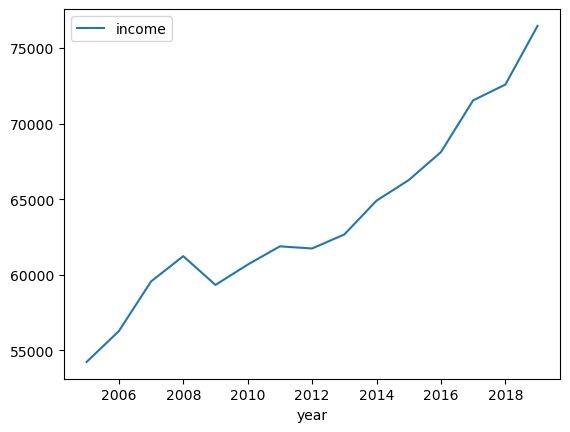

In [8]:
df.plot(x='year', y='income')

## Use AI to Assistant Data Analytics

### Explain Existing Codes

In [17]:
%%ai gpt4
explain the code in {In[7]}

The code snippet is written in Python and uses the pandas library to interact with a SQL database.

1. `import pandas as pd`: This line imports the pandas library and assigns it to the alias "pd". Pandas is a popular data manipulation library in Python.

2. `df = pd.read_sql(sql, con=conn)`: This line uses the `read_sql` function from pandas to run a SQL query (stored in the `sql` variable) on a database connection (represented by `conn`). The result of this query is stored in a pandas DataFrame, which is a two-dimensional table of data with columns of potentially different types. The DataFrame is assigned to the variable `df`.

3. `df.head()`: This line calls the `head` function on the DataFrame. By default, this function returns the first 5 rows of the DataFrame. This is commonly used to quickly inspect the structure and contents of the DataFrame.

The output of this code will be the first 5 rows of the DataFrame created from the SQL query, which can include any number of columns depending on the SQL query used. Note that this output will be in a tabular format, specifically a pandas DataFrame, which can easily be converted to markdown format if needed.

### Create New Codes

In [24]:
%%ai gpt4 -f code
Calculate the year-over-year income growth rate in {df} 
and visualize it on a bar chart

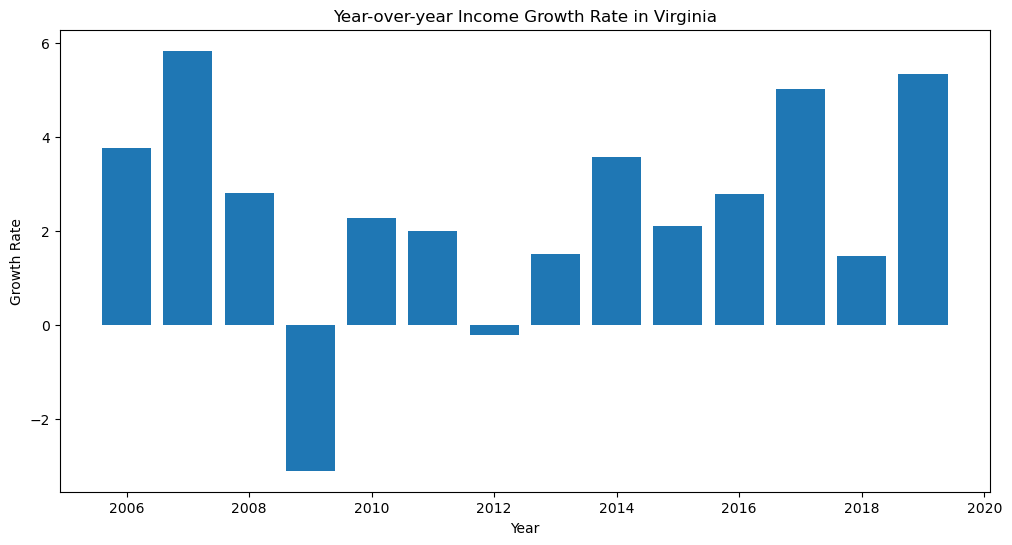

In [26]:
import matplotlib.pyplot as plt
import pandas as pd

# Create DataFrame
data = {'fips': [51]*15, 
        'name': ['Virginia']*15,
        'income': [54240, 56277, 59562, 61233, 59330, 60674, 61882, 61741, 62666, 64902, 66262, 68114, 71535, 72577, 76456],
        'year': list(range(2005, 2020)),
        'growth_rate': [None, 3.755531, 5.837198, 2.805480, -3.107801, 2.265296, 1.990968, -0.227853, 1.498194, 3.568123, 2.095467, 2.794965, 5.022462, 1.456630, 5.344668]}
df = pd.DataFrame(data)

# Plot
plt.figure(figsize=(12,6))
plt.bar(df['year'], df['growth_rate'])
plt.xlabel('Year')
plt.ylabel('Growth Rate')
plt.title('Year-over-year Income Growth Rate in Virginia')
plt.show()


### A Complete Analysis with AI

Load the data from database into Python

In [103]:
%%ai gpt4 -f code
We have a view named name_income in an SQL database
you don't need to redefine the connection string
use the {conn} defined in {In[2]} to load all the recored into pandas dataframe 

In [105]:
import pandas as pd
import psycopg2

# Use the provided connection object
conn = psycopg2.connect(host=get_secret('postgres')['host'],
                      user=get_secret('postgres')['username'],
                      password = get_secret('postgres')['password'],
                      dbname=get_secret('postgres')['engine'])

# Create a cursor object
cur = conn.cursor()

# Execute the SQL command to fetch all records from the view
cur.execute("SELECT * FROM name_income")

# Fetch all the records
rows = cur.fetchall()

# Create a pandas DataFrame from the fetched records
df = pd.DataFrame(rows, columns=[desc[0] for desc in cur.description])

# Close the cursor and connection
cur.close()
conn.close()

# Print the DataFrame
print(df)

    fips           name  income  year
0     01        Alabama   36879  2005
1     02         Alaska   56234  2005
2     04        Arizona   44282  2005
3     05       Arkansas   34999  2005
4     06     California   53629  2005
..   ...            ...     ...   ...
775   53     Washington   78687  2019
776   54  West Virginia   48850  2019
777   55      Wisconsin   64168  2019
778   56        Wyoming   65003  2019
779   72    Puerto Rico   20474  2019

[780 rows x 4 columns]


In [106]:
%%ai gpt4 
What is the information in {df}

The information in the table represents the average income for each state in the United States for the years 2005 to 2019. 

Each row represents a single state's average income for a specific year. The columns are as follows:

- **fips**: This is a numerical code assigned to each state. 
- **name**: This is the name of the state.
- **income**: This is the average income for that state in that year.
- **year**: This is the year for which the average income is calculated.

For example, the first row of the table shows that in the year 2005, the average income in Alabama (fips code 01) was $36,879. 

The last row of the table shows that in the year 2019, the average income in Puerto Rico (fips code 72) was $20,474. 

In total, the table contains data for 780 different state-year combinations.

In [110]:
%%ai gpt4 -f code
Calculate the average year-over-year income growth rate for each state in {df}
and create a chart to show the result

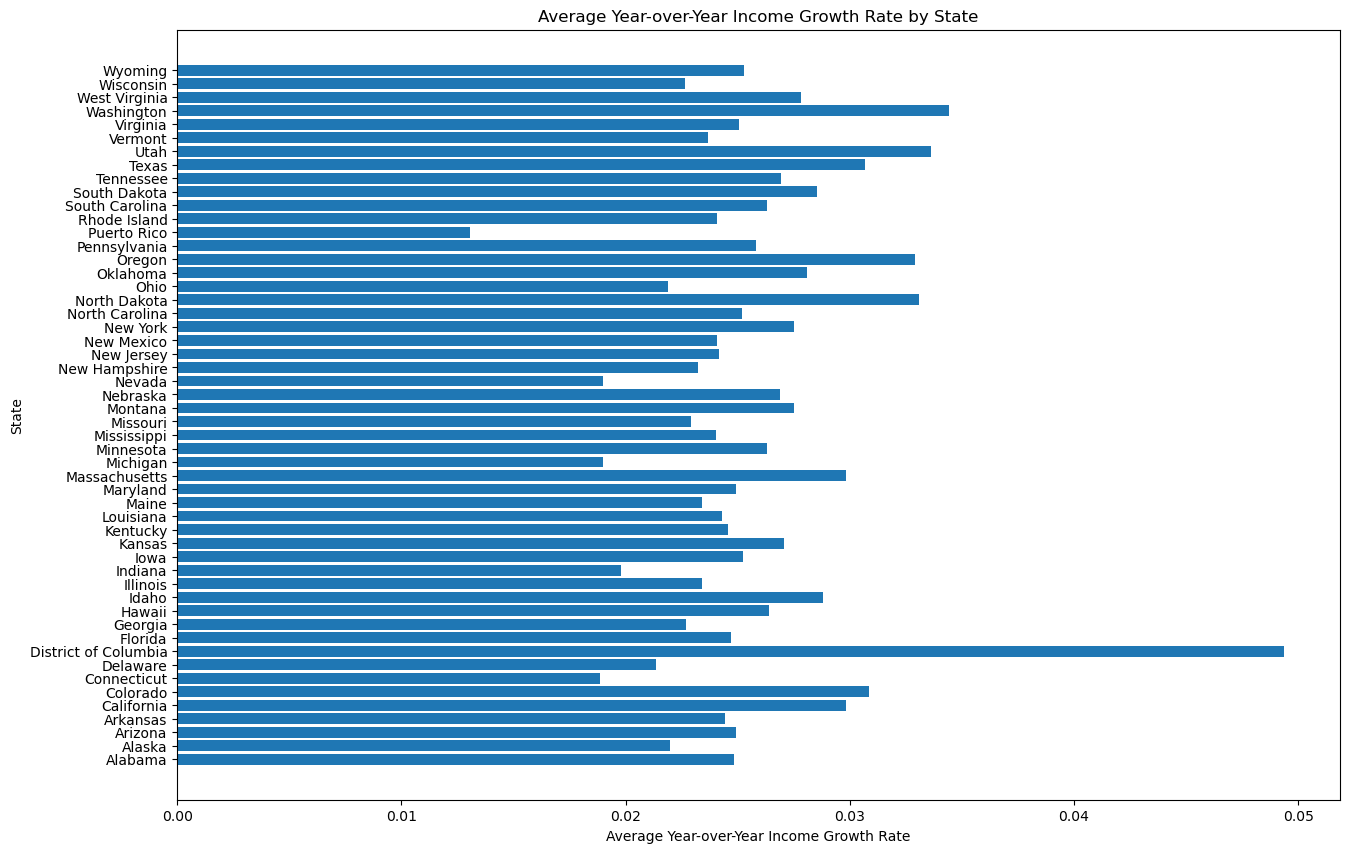

In [111]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the dataframe is named df
df.sort_values(['name', 'year'], inplace=True)

# Calculate the growth rate
df['growth_rate'] = df.groupby('name')['income'].pct_change()

# Calculate average growth rate
average_growth_rate = df.groupby('name')['growth_rate'].mean().reset_index()

# Plotting
plt.figure(figsize=(15,10))
plt.barh(average_growth_rate['name'], average_growth_rate['growth_rate'])
plt.xlabel('Average Year-over-Year Income Growth Rate')
plt.ylabel('State')
plt.title('Average Year-over-Year Income Growth Rate by State')
plt.show()


## Close Database Connection

In [ ]:
cur.close()
conn.close()